In [3]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import os
import PIL
#PIL is image library

##### Load Flower Dataset

In [4]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.',untar=True)
# cache_dir indicates where to download data. untar true will unzip it

In [5]:
data_dir

'./datasets/flower_photos'

In [6]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [9]:
#Get all images in directory
imgage_count=len(list(data_dir.glob('*/*.jpg')))
imgage_count

3670

In [11]:
roses=list(data_dir.glob('roses/*'))
roses[:3]

[PosixPath('datasets/flower_photos/roses/16209331331_343c899d38.jpg'),
 PosixPath('datasets/flower_photos/roses/5777669976_a205f61e5b.jpg'),
 PosixPath('datasets/flower_photos/roses/4860145119_b1c3cbaa4e_n.jpg')]

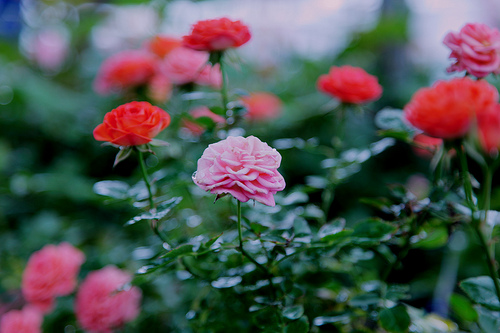

In [13]:
PIL.Image.open(str(roses[1]))

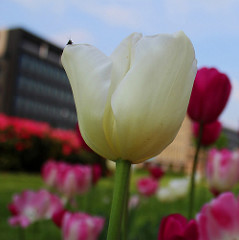

In [16]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

##### Read images from disk to numy array

In [17]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [18]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

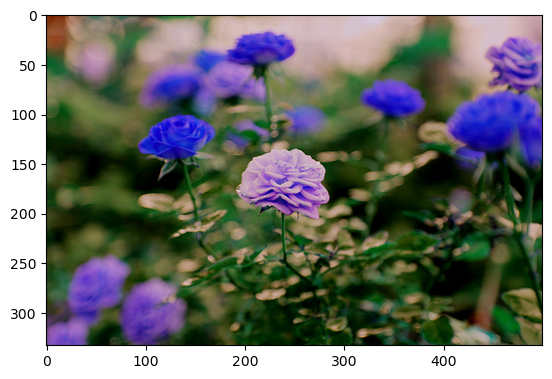

In [22]:
img=cv2.imread(str(flowers_images_dict['roses'][1]))
plt.imshow(img)

In [23]:
img.shape

(333, 500, 3)

In [24]:
# images are with different dimensions
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [25]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [27]:
y[:3]

[0, 0, 0]

In [28]:
#converting to numpy array
X=np.array(X)
y=np.array(y)

##### Train test split

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

##### Normalizing images

In [30]:
X_train=X_train/255
X_test=X_test/255

##### convolutional neural network 

In [37]:
model=Sequential([
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
   layers.Dense(5)#It will consider linear activation
 
])

model.compile(optimizer='adam',
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10)

Epoch 1/10
92/92 [==============================] - 20s 213ms/step - loss: 1.3458 - accuracy: 0.4309
Epoch 2/10
92/92 [==============================] - 19s 212ms/step - loss: 0.9603 - accuracy: 0.6287
Epoch 3/10
92/92 [==============================] - 20s 216ms/step - loss: 0.7740 - accuracy: 0.7095
Epoch 4/10
92/92 [==============================] - 20s 216ms/step - loss: 0.5707 - accuracy: 0.7916
Epoch 5/10
92/92 [==============================] - 20s 217ms/step - loss: 0.3581 - accuracy: 0.8774
Epoch 6/10
92/92 [==============================] - 20s 216ms/step - loss: 0.2181 - accuracy: 0.9292
Epoch 7/10
92/92 [==============================] - 20s 213ms/step - loss: 0.1118 - accuracy: 0.9693
Epoch 8/10
92/92 [==============================] - 20s 213ms/step - loss: 0.0481 - accuracy: 0.9922
Epoch 9/10
92/92 [==============================] - 20s 213ms/step - loss: 0.0422 - accuracy: 0.9908
Epoch 10/10
92/92 [==============================] - 20s 213ms/step - loss: 0.0237 - accura

In [39]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 2s 64ms/step - loss: 1.9157 - accuracy: 0.6322


[1.915688157081604, 0.6321526169776917]

Training accuracy is very high (99%), the test accuracy is significantly low (63%) indicating overfitting.we use data augmentation to address overfitting

In [40]:
predictions = model.predict(X_test)
predictions

23/23 [==============================] - 2s 64ms/step


array([[  6.4694347 ,   8.6778965 ,   7.046935  , -10.620835  ,
         -9.722054  ],
       [  5.798037  ,  -3.3281667 ,  -4.4419966 ,  -2.1362529 ,
          3.1502726 ],
       [  2.713657  ,  -5.452252  ,   8.532495  ,   0.4720051 ,
         -0.47461808],
       ...,
       [ -0.18246694,  11.922875  ,   7.049592  ,  -7.7842927 ,
         -3.8411028 ],
       [  3.5274448 ,  -0.18595976,   8.90848   , -12.255253  ,
         -3.0749872 ],
       [ -3.7229004 ,   0.36086285,  -5.9817095 ,   6.0016313 ,
          7.8577476 ]], dtype=float32)

In [43]:
score=tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8.4151812e-02, 7.6592499e-01, 1.4992315e-01, 3.1831207e-09,
       7.8196889e-09], dtype=float32)>

In [45]:
np.argmax(score)

1

In [46]:
y_test[0]

1

#### Use Data Augmentation to Improve Test Accuracy

In [59]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(180, 
                                                              180,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

Original Image

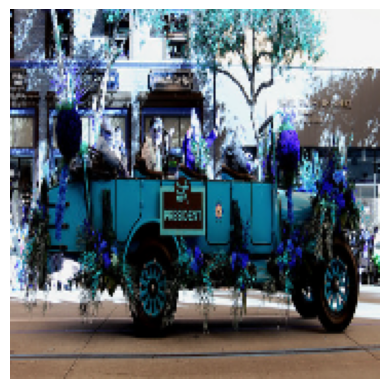

In [62]:
plt.axis('off')
plt.imshow(X[0])

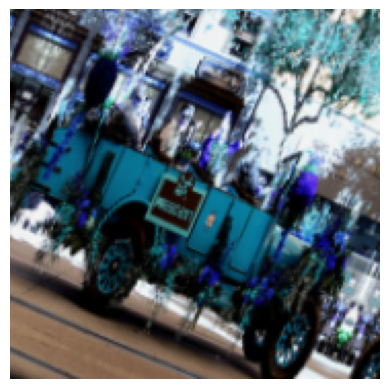

In [61]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

#### Train the model using data augmentation 

In [65]:
num_classes = 5

model = Sequential([
    #data augmentation
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  #droping out 20% of neurans in each pass  
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train, y_train, epochs=10)  

Epoch 1/10
92/92 [==============================] - 23s 243ms/step - loss: 1.3153 - accuracy: 0.4336
Epoch 2/10
92/92 [==============================] - 23s 254ms/step - loss: 1.0742 - accuracy: 0.5777
Epoch 3/10
92/92 [==============================] - 25s 274ms/step - loss: 0.9524 - accuracy: 0.6243
Epoch 4/10
92/92 [==============================] - 23s 252ms/step - loss: 0.8932 - accuracy: 0.6601
Epoch 5/10
92/92 [==============================] - 24s 261ms/step - loss: 0.8126 - accuracy: 0.6853
Epoch 6/10
92/92 [==============================] - 23s 249ms/step - loss: 0.8005 - accuracy: 0.6890
Epoch 7/10
92/92 [==============================] - 23s 247ms/step - loss: 0.7414 - accuracy: 0.7156
Epoch 8/10
92/92 [==============================] - 23s 248ms/step - loss: 0.7061 - accuracy: 0.7319
Epoch 9/10
92/92 [==============================] - 24s 258ms/step - loss: 0.6664 - accuracy: 0.7428
Epoch 10/10
92/92 [==============================] - 23s 248ms/step - loss: 0.6571 - accura

In [66]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 2s 65ms/step - loss: 0.7853 - accuracy: 0.6962


[0.7852706909179688, 0.696185290813446]

Data Augmentation and drop out layer helped in increasing test accuracy to 69%

## TRansfer Learning using MobilenetV2 Model

In [67]:
#!pip install tensorflow_hub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.6/100.6 kB 580.6 kB/s eta 0:00:00a 0:00:01


In [69]:
import tensorflow_hub as hub

#### predictions using ready made model (without any training)

In [70]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

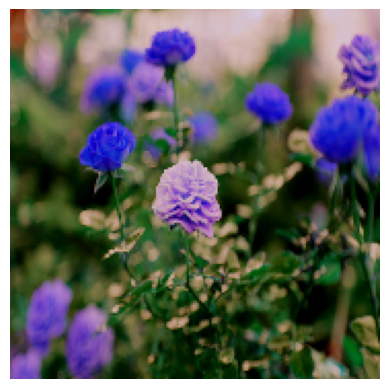

In [72]:
plt.axis('off')
plt.imshow(X[1])

(180, 180, 3)

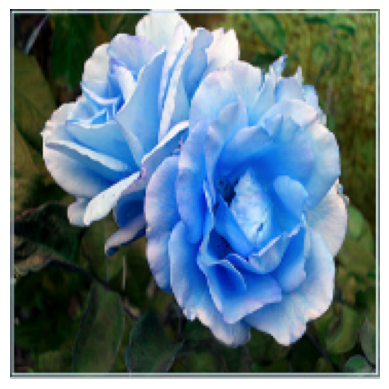

In [95]:
plt.axis('off')
plt.imshow(X[2])
X[2].shape

In [79]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)

In [83]:
predicted = classifier.predict(np.array([x0_resized, x1_resized]))
predicted1 = np.argmax(predicted, axis=1)
predicted1

1/1 [==============================] - 0s 49ms/step


array([795, 795])

In [96]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [97]:
X = np.array(X)
y = np.array(y)

Train test split

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Preprocessing: scale images

In [108]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [109]:
X_train_scaled[0].shape

(224, 224, 3)

In [88]:
#tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

In [87]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [89]:
image_labels[795]

'shower curtain'

#### Need to retrain model using flower dataset

In [101]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [102]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_19 (Dense)            (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [110]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 26s 274ms/step - loss: 0.9005 - acc: 0.6748
Epoch 2/5
86/86 [==============================] - 22s 261ms/step - loss: 0.4315 - acc: 0.8488
Epoch 3/5
86/86 [==============================] - 23s 263ms/step - loss: 0.3345 - acc: 0.8837
Epoch 4/5
86/86 [==============================] - 23s 264ms/step - loss: 0.2790 - acc: 0.9124
Epoch 5/5
86/86 [==============================] - 22s 261ms/step - loss: 0.2363 - acc: 0.9295


In [111]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 8s 264ms/step - loss: 0.3887 - acc: 0.8704


[0.38867151737213135, 0.8703703880310059]

By using Pre-trained model Accuracy is increased to 92% just in 5 epochs.